# Model Building and Model Evaluation

Space X advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is because Space X can reuse the first stage. Therefore if we can determine if the first stage will land, we can determine the cost of a launch. This information can be used if an alternate company wants to bid against space X for a rocket launch. In this Notebook you will create a machine learning pipeline to predict if the first stage will land given the data.

![spaceX Data](https://www.teslarati.com/wp-content/uploads/2020/04/Falcon-Heavy-Demo-Feb-2018-SpaceX-1-crop-2048x956.jpg)

# Objectives
1. Get Features and Label Data
2. Standardize the data
3. Split into training data and test data
4. Encode the data

Find best Hyperparameter for SVM, Classification Trees and Logistic Regression etc.

Find the method performs best model using test data

#### Get All Libraries, Data and Prepare It for model ML Model.

In [9]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier

# ColumnTransformer
from sklearn.compose import ColumnTransformer

# Pipeline
from sklearn.pipeline import Pipeline

# OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

**Get the Data and Perform Feature Engineering on it.**

In [2]:
spacex = pd.read_csv('../Data/dataset_part_2.csv')
spacex.head(2)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6123.547647,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0


### Get Only Required Features
    - Select the Features that will act as Input for ML model.
    - Get Output column

In [3]:
features = ['FlightNumber','PayloadMass','Orbit','LaunchSite','Flights','GridFins','Reused','Legs','Block','ReusedCount','Serial']
selected_features = spacex[features]
output_label = spacex['Class']

In [4]:
selected_features.head(2)

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,Block,ReusedCount,Serial
0,1,6123.547647,LEO,CCSFS SLC 40,1,False,False,False,1.0,0,B0003
1,2,525.000000,LEO,CCSFS SLC 40,1,False,False,False,1.0,0,B0005


### Feature Engineering:

Feature Engineering means converting text data to numerical data. But why it is required to convert text data to numerical data?. Because our machine learning model doesn’t understand text data then we have to do feature engineering. This step is also called Feature extraction from text.

Tasks:
1. Convert Categorical data to Numerical with OneHotEncoder.
2. apply StandardScaler.
3. Pipeline
4. ColumnTransformer
5. Convert Bool to Float.

In [14]:
# Bool to Float.
selected_features[['GridFins','Reused','Legs']] = selected_features[['GridFins','Reused','Legs']].astype(dtype='Float64')

C:\Users\003EPO744\AppData\Local\Temp\ipykernel_20176\787146926.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_features[['GridFins','Reused','Legs']] = selected_features[['GridFins','Reused','Legs']].astype(dtype='Float64')


In [16]:
selected_features.head(1)

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,Block,ReusedCount,Serial
0,1,6123.547647,LEO,CCSFS SLC 40,1,0.0,0.0,0.0,1.0,0,B0003


Now we have only numeric and Categorical data in the dataframe.

### Prepare pipeline for StandardScaling and OnehotEncoding.

In [18]:
numeric_features = ["FlightNumber", "PayloadMass","Flights","GridFins","Reused","Legs","Block","ReusedCount"]
numeric_transformer = Pipeline(
    steps=[("scaler", preprocessing.StandardScaler())]
)

categorical_features = ["Orbit", "LaunchSite", "Serial"]
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

preprocessor = ColumnTransformer(
    transformers=[
        ("numeric", numeric_transformer, numeric_features),
        ("categorical", categorical_transformer, categorical_features),
    ]
)

### Perform Test Train split.

In [19]:
X_train, X_test, y_train, y_test = train_test_split(selected_features, output_label, test_size=0.2, random_state=42)

## Define one General Function for all models to print the Confusion matrix.

In [41]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed'])

# Logistic Regression

In [20]:
parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}# l1 lasso l2 ridge
lr=LogisticRegression()
logreg_cv = GridSearchCV(estimator=lr,param_grid=parameters,cv=10)

clf = Pipeline(
    steps=[("preprocessor", preprocessor), ("Lorreg_cv", logreg_cv)]
)


clf.fit(X_train, y_train)
print("model score: %.3f" % clf.score(X_test, y_test))

model score: 0.944


In [21]:
clf

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['FlightNumber',
                                                   'PayloadMass', 'Flights',
                                                   'GridFins', 'Reused', 'Legs',
                                                   'Block', 'ReusedCount']),
                                                 ('categorical',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Orbit', 'LaunchSite',
                                                   'Serial'])])),
                ('Lorreg_cv',
                 GridSearchCV(cv=10, estimator=LogisticRegression(),
                              param_grid={'C': [0.01, 0.1, 1],
                                          'penalty': ['l2'],
                                          'solver': ['lbfgs']}))])

### Get Best Parameters

In [40]:
clf.get_params()['steps'][1][1].best_params_

{'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}

### Print Confusion matrix

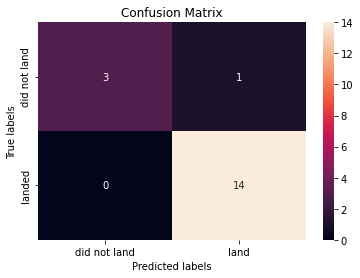

In [43]:
yhat=clf.predict(X_test)
plot_confusion_matrix(y_test,yhat)

# SVC Classification

In [44]:
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
svm = SVC()

svm_cv = GridSearchCV(estimator=svm,param_grid=parameters,cv=10)

clf = Pipeline(
    steps=[("preprocessor", preprocessor), ("svm_cv", svm_cv)]
)


clf.fit(X_train, y_train)
print("model score: %.3f" % clf.score(X_test, y_test))

model score: 0.944


In [45]:
clf

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['FlightNumber',
                                                   'PayloadMass', 'Flights',
                                                   'GridFins', 'Reused', 'Legs',
                                                   'Block', 'ReusedCount']),
                                                 ('categorical',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Orbit', 'LaunchSite',
                                                   'Serial'])])),
                ('svm_cv',
                 GridSearchCV(cv=10, estimator=SVC(),
                              param_grid={'C': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                                          'gamma': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                                          'kernel': ('linear', 'rbf', 'poly',
                                                     'rbf', 'sigmoid')}))])

### Get Best Parameters

In [46]:
clf.get_params()['steps'][1][1].best_params_

{'C': 0.001, 'gamma': 1.0, 'kernel': 'poly'}

### Plot Confusion Matrix

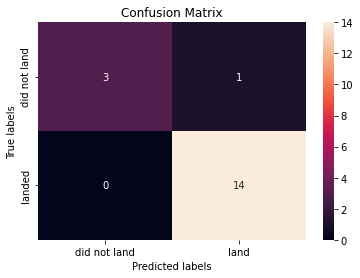

In [47]:
yhat=clf.predict(X_test)
plot_confusion_matrix(y_test,yhat)

# DecesionTreeClassifier

In [51]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()

tree_cv = GridSearchCV(estimator=tree, param_grid=parameters, cv=10)

clf = Pipeline(
    steps=[("preprocessor", preprocessor), ("tree_cv", tree_cv)]
)


clf.fit(X_train, y_train)
print("model score: %.3f" % clf.score(X_test, y_test))

model score: 0.889


In [54]:
clf

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['FlightNumber',
                                                   'PayloadMass', 'Flights',
                                                   'GridFins', 'Reused', 'Legs',
                                                   'Block', 'ReusedCount']),
                                                 ('categorical',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Orbit', 'LaunchSite',
                                                   'Serial'])])),
                ('tree_cv',
                 GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
                              param_grid={'criterion': ['gini', 'entropy'],
                                          'max_depth': [2, 4, 6, 8, 10, 12, 14,
                                                        16, 18],
                                          'max_features': ['sqrt'],
                                          'min_samples_leaf': [1, 2, 4],
                                          'min_samples_split': [2, 5, 10],
                                          'splitter': ['best', 'random']}))])

### Get Best Parameters

In [52]:
clf.get_params()['steps'][1][1].best_params_

{'criterion': 'entropy',
 'max_depth': 12,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'splitter': 'best'}

### Plot Confusion Matrix

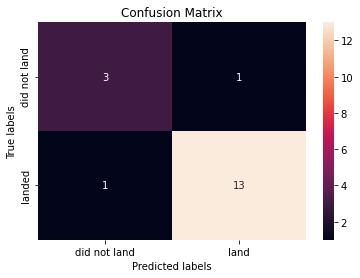

In [53]:
yhat=clf.predict(X_test)
plot_confusion_matrix(y_test,yhat)

# KNN Classifier

In [63]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()

knn_cv = GridSearchCV(estimator=KNN, param_grid=parameters, cv=10)

clf = Pipeline(
    steps=[("preprocessor", preprocessor), ("knn_cv", knn_cv)]
)


clf.fit(X_train, y_train)
print("model score: %.3f" % clf.score(X_test, y_test))

In [56]:
clf

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['FlightNumber',
                                                   'PayloadMass', 'Flights',
                                                   'GridFins', 'Reused', 'Legs',
                                                   'Block', 'ReusedCount']),
                                                 ('categorical',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Orbit', 'LaunchSite',
                                                   'Serial'])])),
                ('knn_cv',
                 GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
                              param_grid={'algorithm': ['auto', 'ball_tree',
                                                        'kd_tree', 'brute'],
                                          'n_neighbors': [1, 2, 3, 4, 5, 6, 7,
                                                          8, 9, 10],
                                          'p': [1, 2]}))])

### Get Best Score

In [57]:
clf.get_params()['steps'][1][1].best_params_

{'algorithm': 'auto', 'n_neighbors': 3, 'p': 2}

### Plot Confusion Matrix

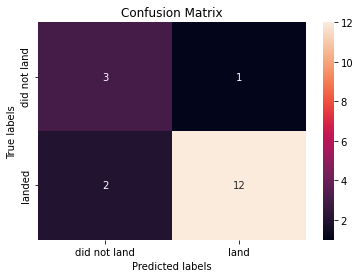

In [58]:
yhat=clf.predict(X_test)
plot_confusion_matrix(y_test,yhat)

# Check the model performance

In [59]:
df = pd.DataFrame({'label':['LogisticRegression','SVC','DecesionTreeClassifier','KNeighborsClassifier'],
       'values':[0.944,0.944,0.88,0.833],'Best Params':[{'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'},{'C': 0.001, 'gamma': 1.0, 'kernel': 'poly'},{'criterion': 'entropy',
 'max_depth': 12,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'splitter': 'best'},{'algorithm': 'auto', 'n_neighbors': 3, 'p': 2}]})

In [60]:
df

,label,values,Best Params
0,LogisticRegression,0.944,"{'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}"
1,SVC,0.944,"{'C': 0.001, 'gamma': 1.0, 'kernel': 'poly'}"
2,DecesionTreeClassifier,0.880,"{'criterion': 'entropy', 'max_depth': 12, 'max..."
3,KNeighborsClassifier,0.833,"{'algorithm': 'auto', 'n_neighbors': 3, 'p': 2}"


Text(0, 0.5, 'Accuracy Score')

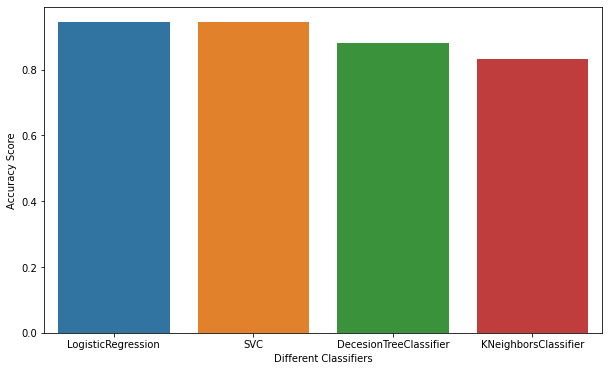

In [61]:
plt.figure(figsize=(10,6))
sns.barplot(x='label',y='values',data=df)
plt.xlabel('Different Classifiers')
plt.ylabel('Accuracy Score')

**After Performing Different models with the help of score it is showing that the best model is `LogisticRegression`**

### End